In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime
import holidays

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cpc.csv to cpc (2).csv


In [ ]:
df= pd.read_csv("cpc.csv")

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [ ]:

missing_values = df.isnull().sum()

In [ ]:

missing_percent = (missing_values / len(df)) * 100

In [ ]:

missing_data = pd.DataFrame({"Пропуски": missing_values, "Процент": missing_percent})
missing_data = missing_data[missing_data["Пропуски"] > 0]
print(missing_data)

                      Пропуски   Процент
Location Description       965  0.402825
Ward                        10  0.004174
X Coordinate              4667  1.948171
Y Coordinate              4667  1.948171
Latitude                  4667  1.948171
Longitude                 4667  1.948171
Location                  4667  1.948171


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df.dropna(inplace=True)

Missing Values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234238 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234238 non-null  int64  
 1   Case Number           234238 non-null  object 
 2   Date                  234238 non-null  object 
 3   Block                 234238 non-null  object 
 4   IUCR                  234238 non-null  object 
 5   Primary Type          234238 non-null  object 
 6   Description           234238 non-null  object 
 7   Location Description  234238 non-null  object 
 8   Arrest                234238 non-null  bool   
 9   Domestic              234238 non-null  bool   
 10  Beat                  234238 non-null  int64  
 11  District              234238 non-null  int64  
 12  Ward                  234238 non-null  float64
 13  Community Area        234238 non-null  int64  
 14  FBI Code              234238 non-null  object 
 15  X Coo

In [ ]:
import numpy as np
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column].dropna(), 25)
    Q3 = np.percentile(data[column].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
numeric_columns = ["Beat", "District", "Ward", "Community Area", "X Coordinate", "Y Coordinate", "Latitude", "Longitude", "Year"]

for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Выбросов в {col}: {len(outliers)}")


Выбросов в Beat: 0
Выбросов в District: 0
Выбросов в Ward: 0
Выбросов в Community Area: 0
Выбросов в X Coordinate: 1710
Выбросов в Y Coordinate: 2
Выбросов в Latitude: 2
Выбросов в Longitude: 1711
Выбросов в Year: 0


In [ ]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,53621
BATTERY,40800
CRIMINAL DAMAGE,27028
MOTOR VEHICLE THEFT,21386
ASSAULT,20737
DECEPTIVE PRACTICE,14737
OTHER OFFENSE,14369
ROBBERY,8952
WEAPONS VIOLATION,8709


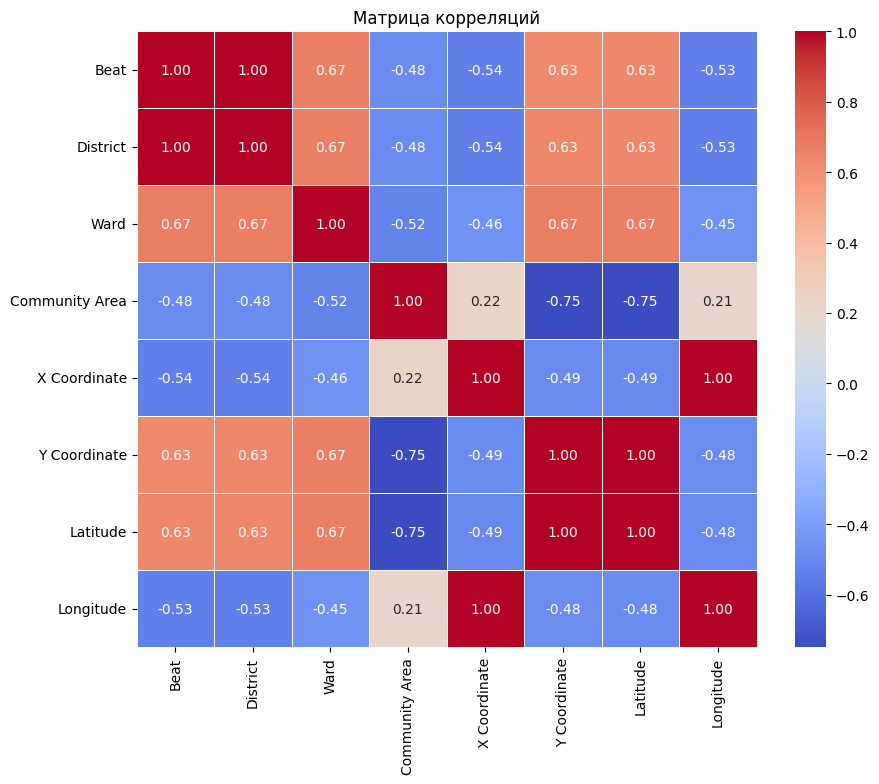

In [ ]:
numeric_columns = ['Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate','Latitude', 'Longitude']
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

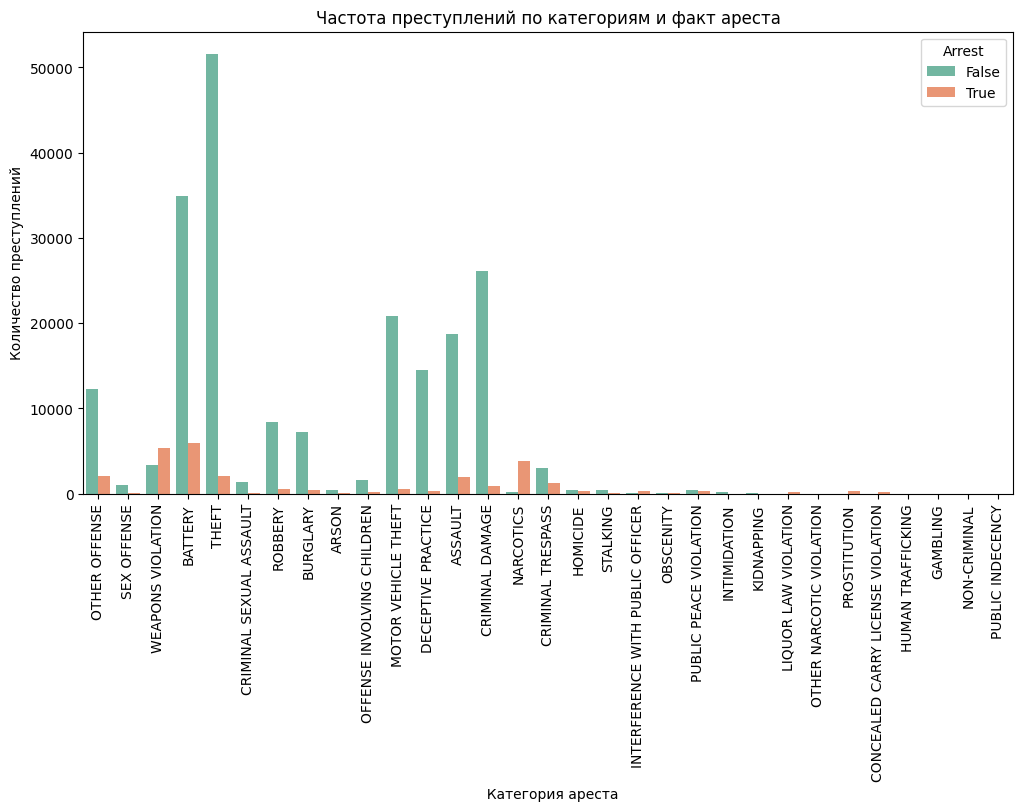

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary Type', hue='Arrest', palette='Set2')
plt.title('Частота преступлений по категориям и факт ареста')
plt.xlabel('  Категория ареста')
plt.ylabel('Количество преступлений')
plt.xticks(rotation=90)
plt.show()

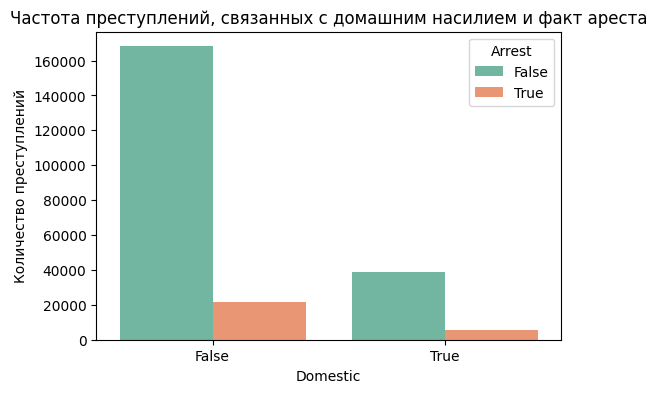

In [115]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Domestic', hue='Arrest', palette='Set2')
plt.title('Частота преступлений, связанных с домашним насилием и факт ареста')
plt.ylabel('Количество преступлений')
plt.show()

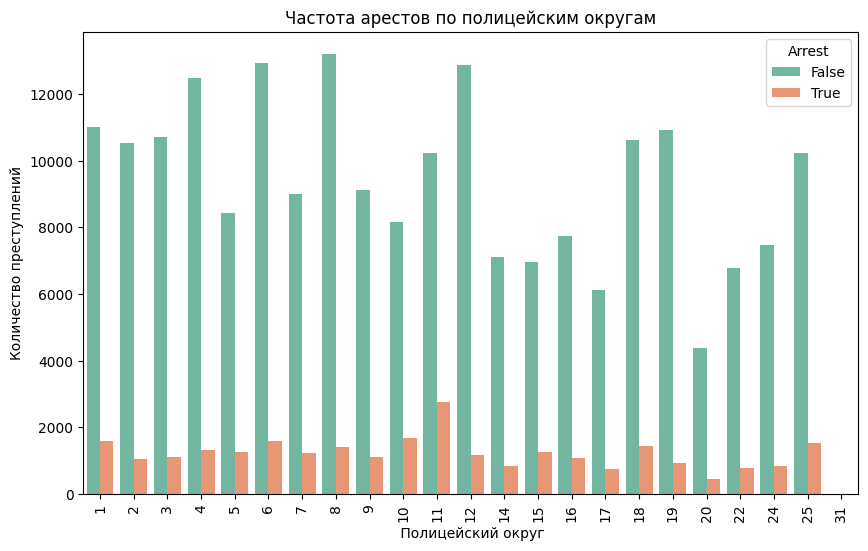

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='District', hue='Arrest', palette='Set2')
plt.title('Частота арестов по полицейским округам')
plt.xlabel(' Полицейский округ')
plt.ylabel('Количество преступлений')
plt.xticks(rotation=90)
plt.show()

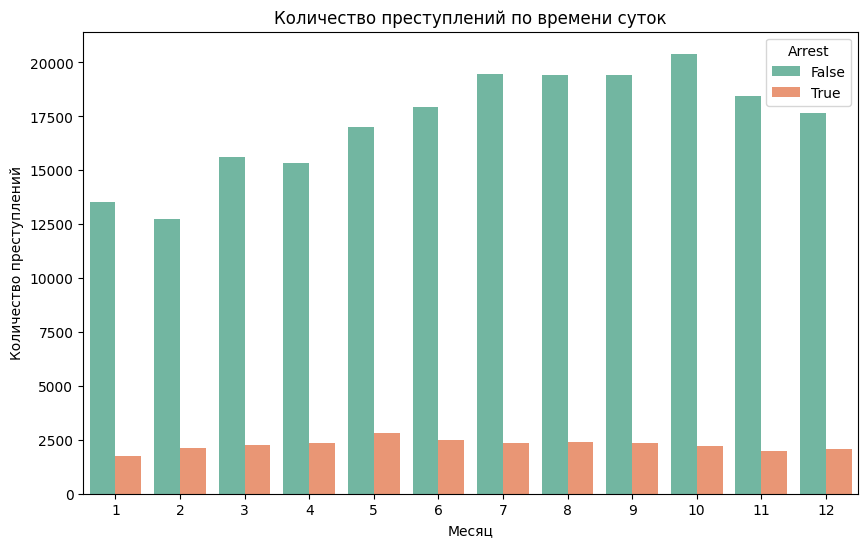

In [111]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Arrest', palette='Set2')
plt.title('Количество преступлений по времени суток')
plt.xlabel('Месяц')
plt.ylabel('Количество преступлений')
plt.show()

<ipython-input-96-ff1d67c0c810>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time_of_Day', palette='Blues', order=['Ночь', 'Утро', 'День', 'Вечер'])


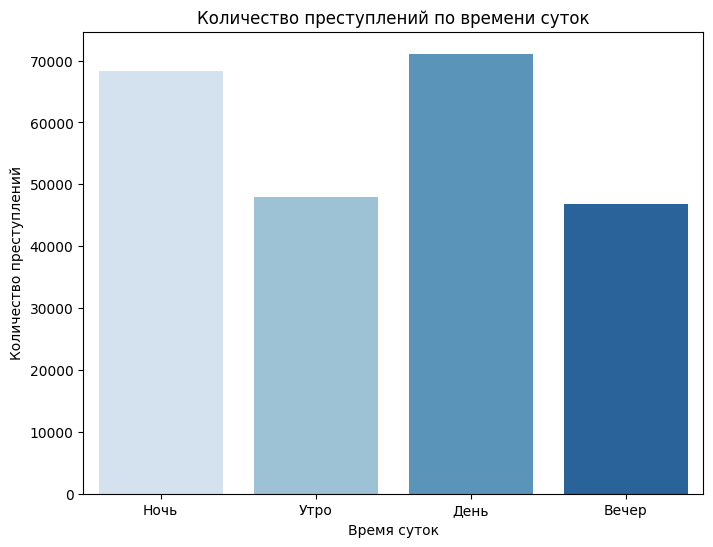

In [96]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Утро'  # Утро
    elif 12 <= hour < 18:
        return 'День'  # День
    elif 18 <= hour < 22:
        return 'Вечер'  # Вечер
    else:
        return 'Ночь'  # Ночь
df['Time_of_Day'] = df['Hour'].apply(time_of_day)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day', palette='Blues', order=['Ночь', 'Утро', 'День', 'Вечер'])
plt.title('Количество преступлений по времени суток')
plt.xlabel('Время суток')
plt.ylabel('Количество преступлений')
plt.show()




<ipython-input-97-8efe6f53b5d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='Blues_r')  # Используем инвертированную палитру 'Blues_r'


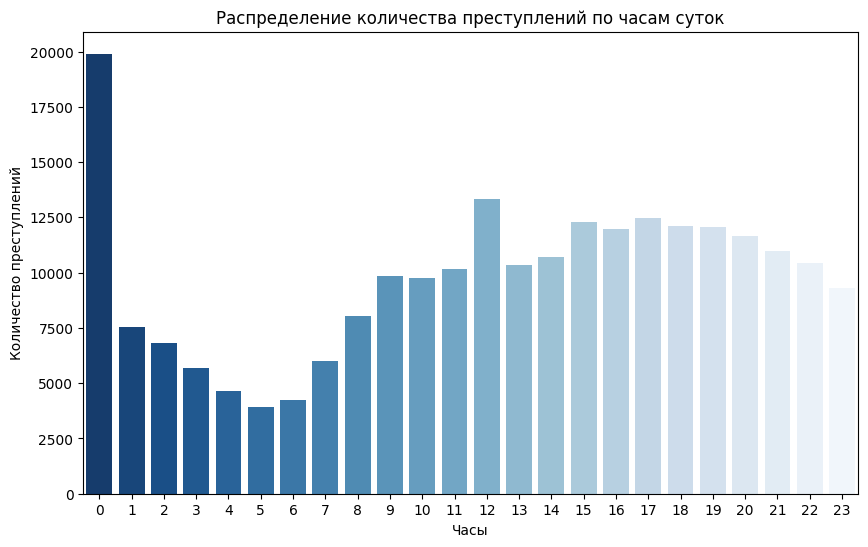

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='Blues_r')  # Используем инвертированную палитру 'Blues_r'
plt.title('Распределение количества преступлений по часам суток')
plt.xlabel('Часы')
plt.ylabel('Количество преступлений')
plt.xticks(range(0, 24))  # Отображаем все часы
plt.show()

<ipython-input-81-a09c4a610469>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Primary Type', palette='viridis', order=df['Primary Type'].value_counts().index)


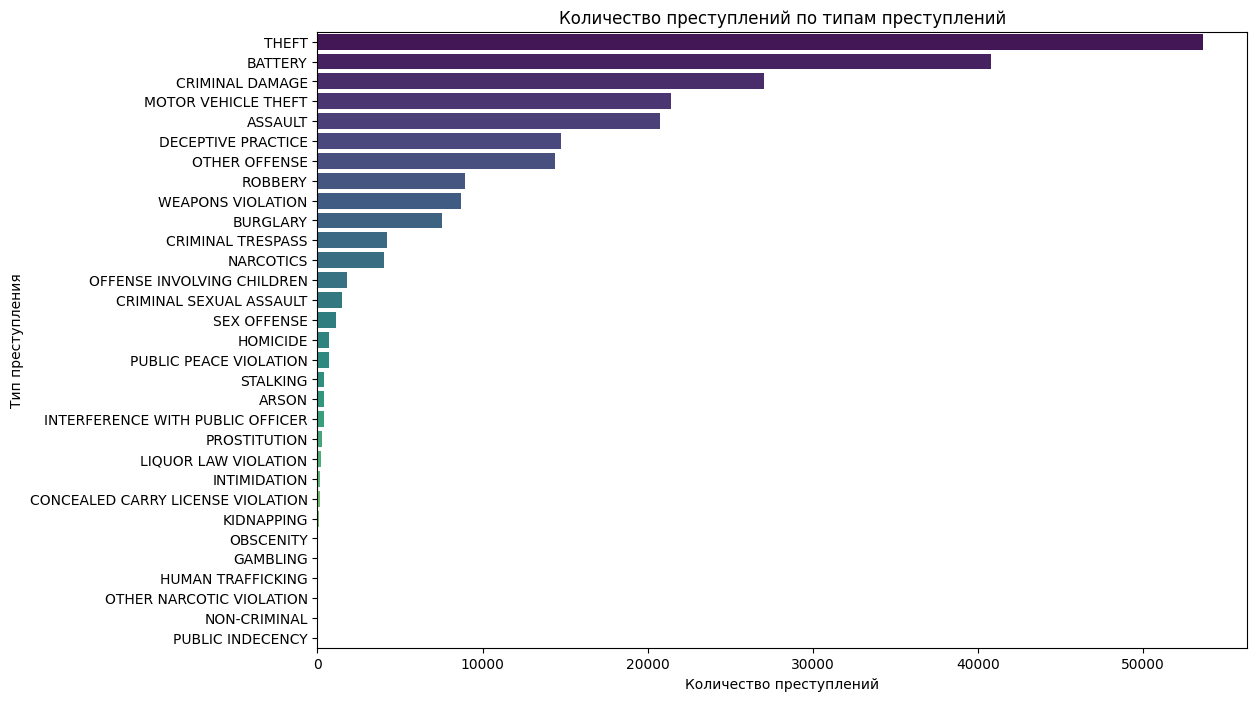

In [81]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Primary Type', palette='viridis', order=df['Primary Type'].value_counts().index)
plt.title('Количество преступлений по типам преступлений')
plt.xlabel('Количество преступлений')
plt.ylabel('Тип преступления')
plt.show()

<ipython-input-90-2517c2d86a68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Arrest'] == True], y='Primary Type', palette='Blues_d', order=df['Primary Type'].value_counts().index)


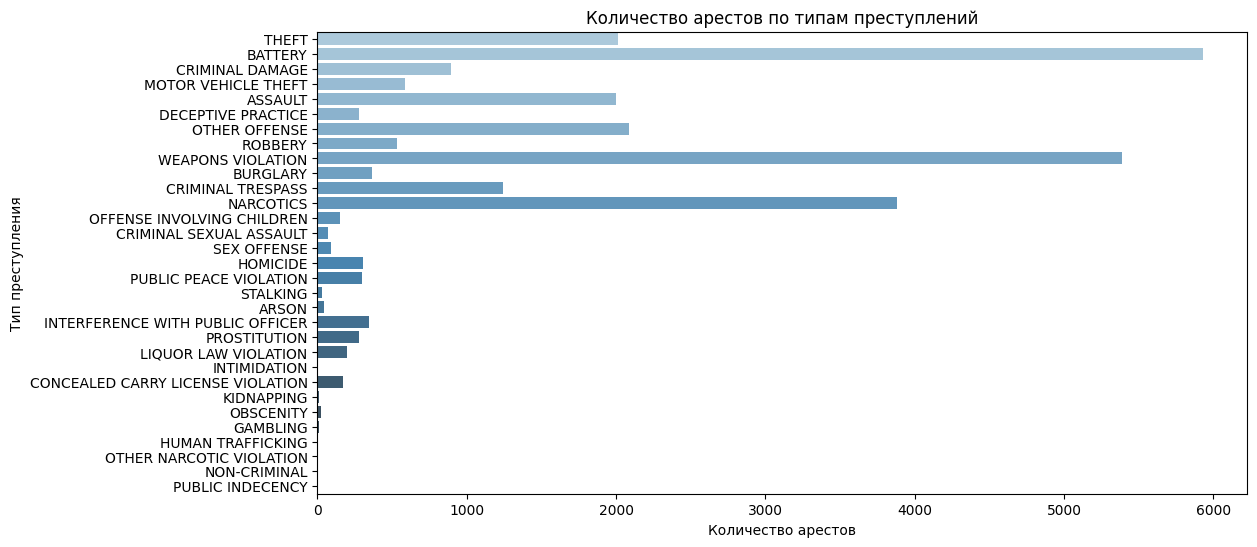

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Arrest'] == True], y='Primary Type', palette='Blues_d', order=df['Primary Type'].value_counts().index)
plt.title('Количество арестов по типам преступлений')
plt.xlabel('Количество арестов')
plt.ylabel('Тип преступления')
plt.show()


<ipython-input-83-8bfc6973d8a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Ward', palette='magma', order=df['Ward'].value_counts().index)


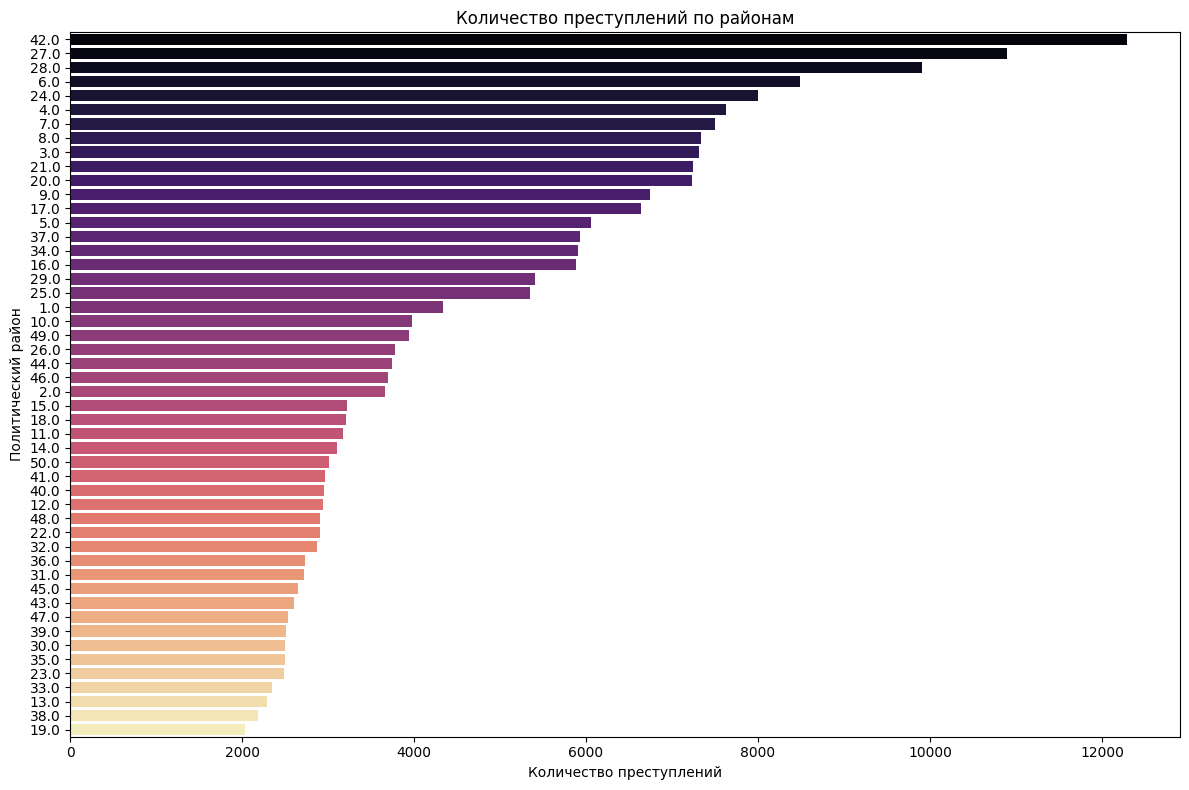

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Ward', palette='magma', order=df['Ward'].value_counts().index)
plt.title('Количество преступлений по районам')
plt.xlabel('Количество преступлений')
plt.ylabel('Политический район')
plt.tight_layout()
plt.show()

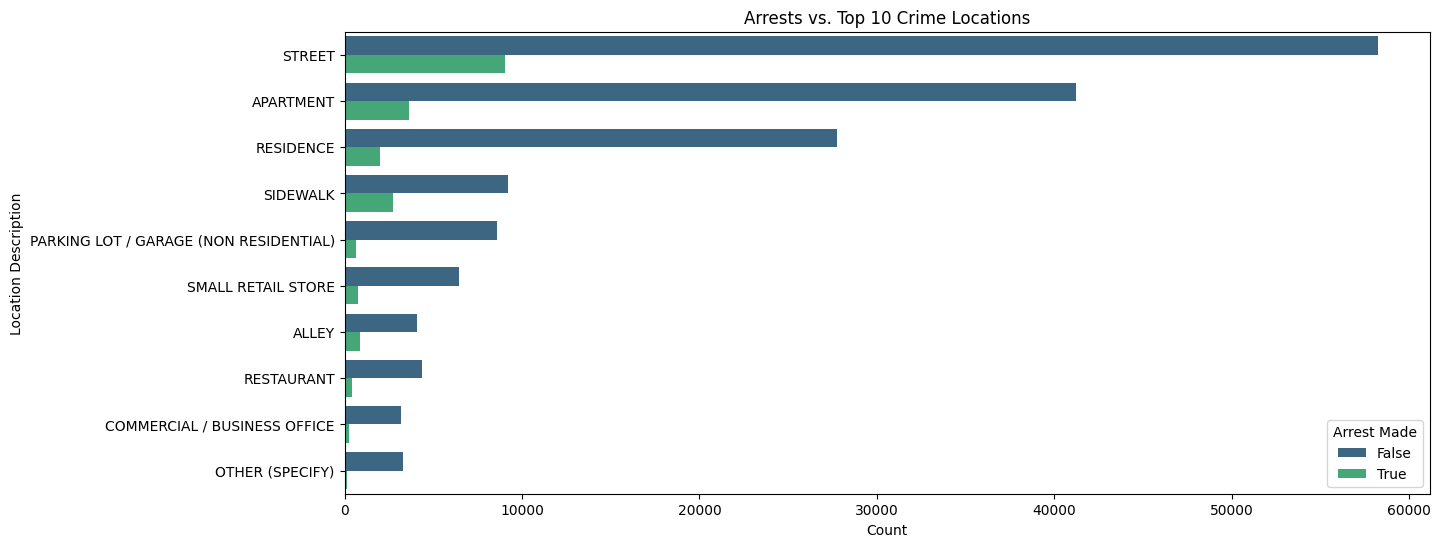

In [102]:
copy_df = df.copy()
if "location_group" not in copy_df.columns:
    copy_df["location_group"] = copy_df["Location Description"]
top_locations = copy_df["location_group"].value_counts().head(10).index.tolist()

filtered_df = copy_df[copy_df["location_group"].isin(top_locations)]

plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_df, y="location_group", hue="Arrest", order=top_locations, palette="viridis")
plt.title("Arrests vs. Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location Description")
plt.legend(title="Arrest Made")
plt.show()